In [1]:
import re
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# 如果浏览器不显示图片，就需要加上这句话
%matplotlib inline  

# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'   
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False  

# 支持svg矢量图
%config Inlinebackend.figure_format = 'svg'  

In [3]:
df_高考 = pd.read_csv('./评论用户数据/高考_评论用户数据.csv')
df_考研 = pd.read_csv('./评论用户数据/考研_评论用户数据.csv')
df_考公 = pd.read_csv('./评论用户数据/考公_评论用户数据.csv')
df_就业 = pd.read_csv('./评论用户数据/就业_评论用户数据.csv')

# 创建二级行索引
index_labels = ['高考'] * len(df_高考) + ['考研'] * len(df_考研) + ['考公'] * len(df_考公) + ['就业'] * len(df_就业)
merged_df = pd.concat([df_高考, df_考研, df_考公, df_就业]).reset_index(drop=True)
merged_df.index = pd.MultiIndex.from_arrays([index_labels, merged_df.index])

merged_df

用户主页url        用户名称 用户性别     ip地址  \
高考 0       https://space.bilibili.com/1372808255       I昆两年半   保密  IP属地：天津   
   1       https://space.bilibili.com/1814787649  7544145iio    男  IP属地：山西   
   2        https://space.bilibili.com/159150662     百万大咖666   保密  IP属地：浙江   
   3       https://space.bilibili.com/2108901233        西南59   保密  IP属地：四川   
   4        https://space.bilibili.com/431212010          聊河    男  IP属地：河北   
...                                          ...         ...  ...      ...   
就业 346882   https://space.bilibili.com/243676625     地平线早已锈掉   保密  IP属地：山东   
   346883   https://space.bilibili.com/523026517     薛定谔的bug   保密  IP属地：广西   
   346884    https://space.bilibili.com/24726003     小逗比呀小逗比   保密  IP属地：广东   
   346885    https://space.bilibili.com/32883761       历史的幽灵   保密  IP属地：湖南   
   346886   https://space.bilibili.com/675453397        晓宇崽子    男  IP属地：重庆   

                                                 用户评论  
高考 0                    4年后，今年考研人数突破600万，史上最难考研[doge]  
   1                       这算是预言未来吗[doge][doge][doge]  
   2                  4年后，考研肯定不止600万， 可能突破700万，甚至800万  
   3                                     一起把工资卷到1500吧  
   4                             谢谢，刚考完，已经在找大专了[灵魂出窍]  
...                                               ...  
就业 346882                           好家伙，自己还没赚钱就帮上别人是吧  
   346883  已经转自由主义了，不认同老师的理论，但仍然谢谢老师，取关了，望一切安好，再见[委屈]  
   346884                         这还能转的，只能表示一开始就是自由主义  
   346885                                        什么转职  
   346886                                卡牌游戏，你哪有什么主义  

[346887 rows x 5 columns]

In [4]:
merged_df_filtered = merged_df[merged_df['用户性别'] != '保密']
count_merged_df_sex = merged_df_filtered.groupby('用户性别').size().reset_index(name='人数')
count_merged_df_sex

,用户性别,人数
0,女,43696
1,男,102987


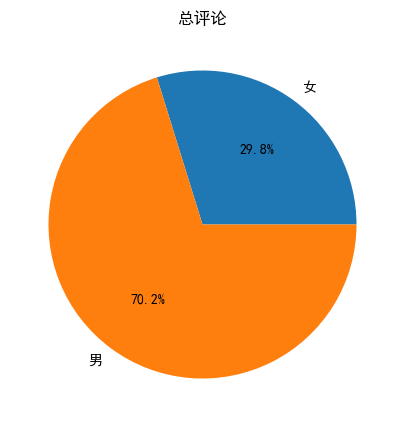

In [5]:
plt.figure(figsize=(5, 5))
plt.pie(x=count_merged_df_sex['人数'], labels=count_merged_df_sex['用户性别'], autopct='%.1f%%')
plt.title('总评论')
plt.show()

In [6]:
df_高考_filtered = df_高考[df_高考['用户性别'] != '保密']
df_考研_filtered = df_考研[df_考研['用户性别'] != '保密']
df_考公_filtered = df_考公[df_考公['用户性别'] != '保密']
df_就业_filtered = df_就业[df_就业['用户性别'] != '保密']

count_高考_sex = df_高考_filtered.groupby('用户性别').size().reset_index(name='人数')
count_考研_sex = df_考研_filtered.groupby('用户性别').size().reset_index(name='人数')
count_考公_sex = df_考公_filtered.groupby('用户性别').size().reset_index(name='人数')
count_就业_sex = df_就业_filtered.groupby('用户性别').size().reset_index(name='人数')
count_就业_sex

,用户性别,人数
0,女,3584
1,男,13818


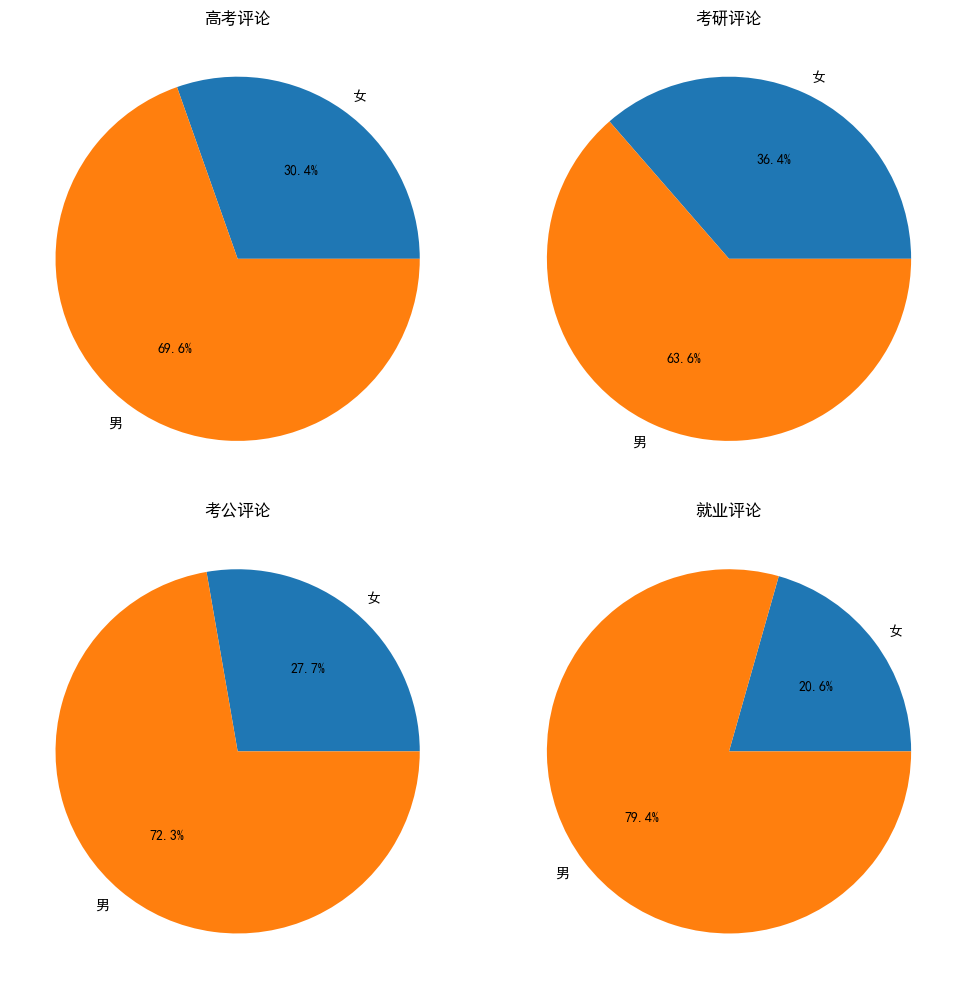

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 创建一个 2x2 的子图布局

# 绘制子图1
axes[0, 0].pie(count_高考_sex['人数'], labels=count_高考_sex['用户性别'], autopct='%.1f%%')
axes[0, 0].set_title('高考评论')

# 绘制子图2
axes[0, 1].pie(count_考研_sex['人数'], labels=count_考研_sex['用户性别'], autopct='%.1f%%')
axes[0, 1].set_title('考研评论')

# 绘制子图3
axes[1, 0].pie(count_考公_sex['人数'], labels=count_考公_sex['用户性别'], autopct='%.1f%%')
axes[1, 0].set_title('考公评论')

# 绘制子图4
axes[1, 1].pie(count_就业_sex['人数'], labels=count_就业_sex['用户性别'], autopct='%.1f%%')
axes[1, 1].set_title('就业评论')

plt.tight_layout()  # 调整子图布局


In [21]:
merged_df_ip_filtered = merged_df[merged_df['ip地址'] != 'ip属地：未知']
merged_df_ip_filtered['ip地址'] = merged_df_ip_filtered['ip地址'].str.replace('IP属地：', '')
count_ip = merged_df_ip_filtered.groupby('ip地址').size().reset_index(name='人数')
count_ip = count_ip[count_ip['ip地址'] != '未知']

In [22]:
df_高考_ip_filtered = df_高考[df_高考['ip地址'] != 'ip属地：未知']
df_高考_ip_filtered['ip地址'] = df_高考_ip_filtered['ip地址'].str.replace('IP属地：', '')
count_高考_ip = df_高考_ip_filtered.groupby('ip地址').size().reset_index(name='人数')
count_高考_ip = count_高考_ip[count_高考_ip['ip地址'] != '未知']

In [23]:
df_考研_ip_filtered = df_考研[df_考研['ip地址'] != 'ip属地：未知']
df_考研_ip_filtered['ip地址'] = df_考研_ip_filtered['ip地址'].str.replace('IP属地：', '')
count_考研_ip = df_考研_ip_filtered.groupby('ip地址').size().reset_index(name='人数')
count_考研_ip = count_考研_ip[count_考研_ip['ip地址'] != '未知']

In [24]:
df_考公_ip_filtered = df_考公[df_考公['ip地址'] != 'ip属地：未知']
df_考公_ip_filtered['ip地址'] = df_考公_ip_filtered['ip地址'].str.replace('IP属地：', '')
count_考公_ip = df_考公_ip_filtered.groupby('ip地址').size().reset_index(name='人数')
count_考公_ip = count_考公_ip[count_考公_ip['ip地址'] != '未知']

In [25]:
df_就业_ip_filtered = df_就业[df_就业['ip地址'] != 'ip属地：未知']
df_就业_ip_filtered['ip地址'] = df_就业_ip_filtered['ip地址'].str.replace('IP属地：', '')
count_就业_ip = df_就业_ip_filtered.groupby('ip地址').size().reset_index(name='人数')
count_就业_ip = count_就业_ip[count_就业_ip['ip地址'] != '未知']

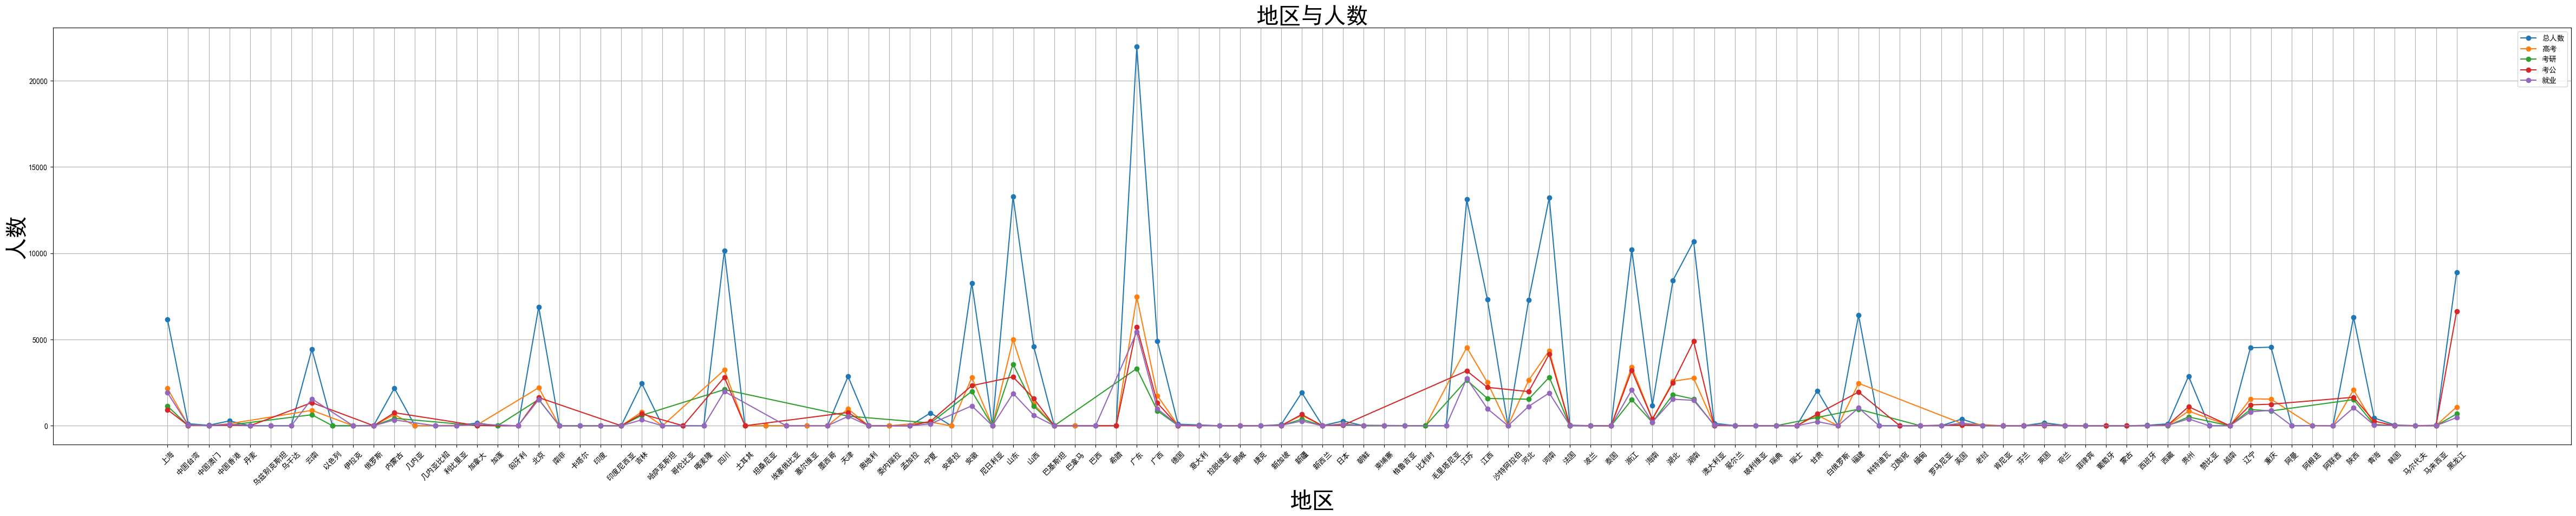

In [35]:
plt.figure(figsize=(60, 10))

plt.title('地区与人数', fontsize=30)
plt.xlabel('地区', fontsize=30)
plt.ylabel('人数', fontsize=30)

x_sum = count_ip['ip地址'].tolist()
y_sum = count_ip['人数'].tolist()
plt.plot(x_sum, y_sum, ls='-', marker='o', label='总人数')

x_高考 = count_高考_ip['ip地址'].tolist()
y_高考 = count_高考_ip['人数'].tolist()
plt.plot(x_高考, y_高考, ls='-', marker='o', label='高考')

x_考研 = count_考研_ip['ip地址'].tolist()
y_考研 = count_考研_ip['人数'].tolist()
plt.plot(x_考研, y_考研, ls='-', marker='o', label='考研')

x_考公 = count_考公_ip['ip地址'].tolist()
y_考公 = count_考公_ip['人数'].tolist()
plt.plot(x_考公, y_考公, ls='-', marker='o', label='考公')

x_就业 = count_就业_ip['ip地址'].tolist()
y_就业 = count_就业_ip['人数'].tolist()
plt.plot(x_就业, y_就业, ls='-', marker='o', label='就业')

plt.grid(True)

plt.xticks(rotation=45)

plt.legend()

plt.show()
